# Comparison of different Classification Algorithms



In [21]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

from main import normalize_data, metrics
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

In [53]:
importer = DatasetImporter('data/testset.csv')
X = importer.data
y = importer.target
X = normalize_data(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.80, random_state=42)

X[:5]

,repo_size,pdf_count,is_io_page,md_count,avg_entropy,doc_in_description_or_title,hw_terminology_commits,doc_terms_in_readme,edu_mail_ratio,up_to_dateness,hw_terminology_files,html_count,file_count,file_folder_ratio,png_count,open_issue_count,watcher_count,avg_folder_depth,forks_count
0,0.752535,0.000000,0.0,0.187607,0.286807,0.0,0.631514,0.079104,0.007613,0.000086,0.000000,0.000000,0.405086,0.330250,0.008444,0.639894,0.772247,0.253733,0.568263
1,0.369789,0.000000,0.0,0.230062,0.284243,0.0,0.000000,0.000000,0.000000,0.043897,0.000000,0.000000,0.138886,0.086028,0.000000,0.151507,0.752640,0.333086,0.534210
2,0.734472,0.314454,0.0,0.302638,0.445036,0.0,0.360522,0.222073,0.016060,0.015705,0.000000,0.328676,0.484467,0.274775,0.125589,0.000000,0.000000,0.236519,0.000000
3,0.373389,0.000000,0.0,0.415712,0.270876,0.0,0.000000,0.347449,0.000000,0.008122,0.195343,0.000000,0.344582,0.169127,0.000000,0.000000,0.000000,0.736634,0.000000
4,0.508392,0.000000,0.0,0.217729,0.293983,0.0,0.088202,0.125377,0.034765,0.251397,0.000000,0.000000,0.349585,0.209958,0.078354,0.000000,0.000000,0.534729,0.000000


## Helper

In [23]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
def analyze_results(model):
    print('acc train:', model.score(X_train, y_train))
    print('acc test:', model.score(X_test, y_test))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)), np.unique(y_test))

In [25]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [26]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.38
acc test: 0.36486486486486486


## Logistic Regression

In [27]:
logreg = sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

acc train: 0.54
acc test: 0.425675675676
Confusion matrix, without normalization
[[ 0 11  0  0  0  1  0]
 [ 0 49  0  0  1  4  0]
 [ 2  8  1  0  1  1  0]
 [ 2 18  0  0  0  1  0]
 [ 0 12  0  0  2  3  0]
 [ 1 13  0  0  2 11  0]
 [ 0  4  0  0  0  0  0]]


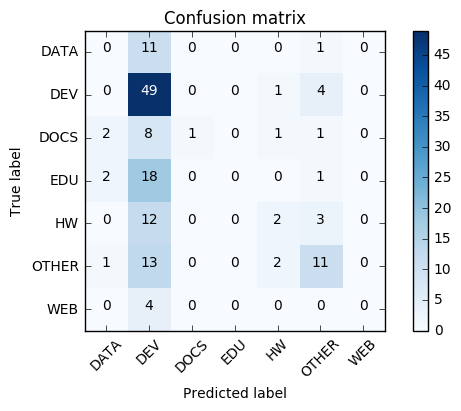

In [28]:
analyze_results(logreg)

## SVM

In [29]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(X_train, y_train)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)

acc train: 0.596666666667
acc test: 0.486486486486
Confusion matrix, without normalization
[[ 6  4  0  0  0  2  0]
 [ 0 43  0  0  3  8  0]
 [ 2  8  1  0  1  1  0]
 [ 5 12  0  1  0  3  0]
 [ 0 10  0  0  3  4  0]
 [ 0  6  0  0  3 18  0]
 [ 0  4  0  0  0  0  0]]


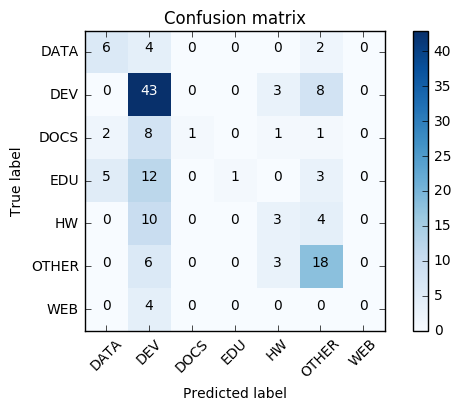

In [30]:
analyze_results(svm)

## DecisionTree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

acc train: 0.99
acc test: 0.513513513514
Confusion matrix, without normalization
[[ 7  2  2  0  0  1  0]
 [ 6 39  0  0  5  1  3]
 [ 1  2  6  2  1  0  1]
 [ 3  5  4  5  2  1  1]
 [ 1  4  2  2  3  4  1]
 [ 0  6  3  1  1 16  0]
 [ 0  3  0  1  0  0  0]]


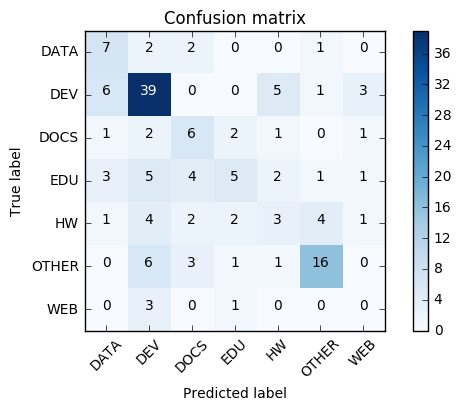

In [32]:
analyze_results(dtc)

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

acc train: 0.99
acc test: 0.560810810811
Confusion matrix, without normalization
[[ 6  4  1  0  0  1  0]
 [ 0 50  0  0  1  2  1]
 [ 2  5  3  0  1  1  1]
 [ 4  9  1  5  0  2  0]
 [ 1  8  1  0  3  4  0]
 [ 1  6  3  0  1 16  0]
 [ 0  4  0  0  0  0  0]]


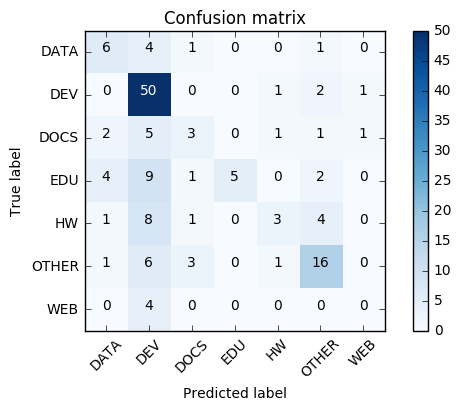

In [34]:
analyze_results(rf)

## NN

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1337,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

acc train: 0.796666666667
acc test: 0.608108108108
Confusion matrix, without normalization
[[ 9  2  0  0  0  1  0]
 [ 3 45  0  0  3  2  1]
 [ 2  3  4  0  2  1  1]
 [ 3  3  2  8  4  1  0]
 [ 0  4  1  2  6  4  0]
 [ 1  5  1  1  2 17  0]
 [ 0  3  0  0  0  0  1]]


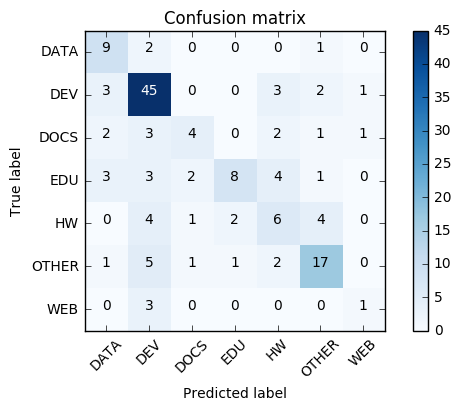

In [36]:
analyze_results(mlp)

## Two Step Stuff

In [37]:
from customClassifier.TwoStepClassifier import TwoStepClassifier
tsc = TwoStepClassifier(
    sklearn.neural_network.MLPClassifier(max_iter=20000, hidden_layer_sizes=(50,20), random_state=1337, shuffle=False, learning_rate='adaptive'),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(X_train, y_train)

acc train: 0.906666666667
acc test: 0.554054054054
Confusion matrix, without normalization
[[ 8  2  1  0  0  1  0]
 [ 3 36  2  0  4  7  2]
 [ 3  2  5  0  1  1  1]
 [ 3  2  1  8  3  2  2]
 [ 1  4  2  0  7  3  0]
 [ 2  1  3  1  2 18  0]
 [ 0  4  0  0  0  0  0]]


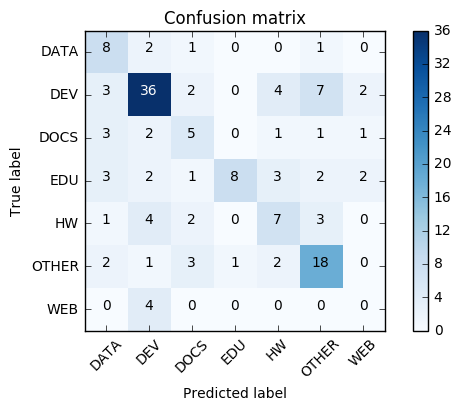

In [38]:
analyze_results(tsc)

# Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.15, random_state=1337)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1337,
              subsample=1.0, verbose=0, warm_start=False)

acc train: 0.99
acc test: 0.587837837838
Confusion matrix, without normalization
[[ 7  2  0  0  1  2  0]
 [ 0 50  2  0  1  0  1]
 [ 2  5  5  0  0  0  1]
 [ 1  6  1  5  4  4  0]
 [ 1  5  3  0  5  3  0]
 [ 0  8  3  1  1 14  0]
 [ 0  3  0  0  0  0  1]]


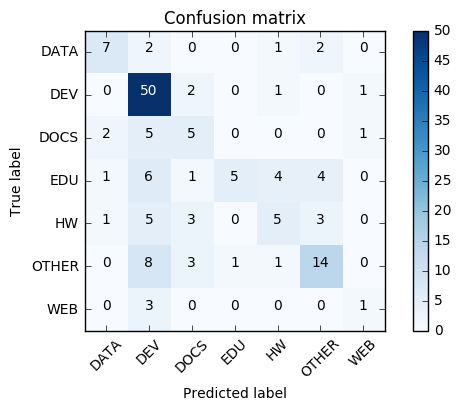

In [40]:
analyze_results(gbc)

## Voting Classifier

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('svc', SVC(C=20.0, random_state=1337)),
                      ('rf', RandomForestClassifier(n_estimators=100, random_state=1337)),
                      ('mlp', MLPClassifier(max_iter=20000, hidden_layer_sizes=(50, 20), random_state=1337, shuffle=False,
                                    learning_rate='adaptive')),
                      ('mlp2', MLPClassifier(max_iter=20000, hidden_layer_sizes=(100,), random_state=1337, shuffle=False, learning_rate='adaptive')),
                      #('gb', GradientBoostingClassifier(learning_rate=0.15, random_state=1337)),
                      ], n_jobs=1)
vc.fit(X, y)

VotingClassifier(estimators=[('svc', SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)), ('rf', RandomForestClassifier(bootstrap=True, class_w...False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))],
         n_jobs=1, voting='hard', weights=None)

acc train: 0.719101123596
acc test: 0.696378830084
Confusion matrix, without normalization
[[ 30   5   0   0   0   4   0]
 [  2 118   0   0   0  10   0]
 [  5  11  17   0   2   1   0]
 [  7   7   0  16   1   4   0]
 [  0  14   0   2  23   8   0]
 [  0   9   2   2   0  45   0]
 [  0  11   0   0   0   2   1]]


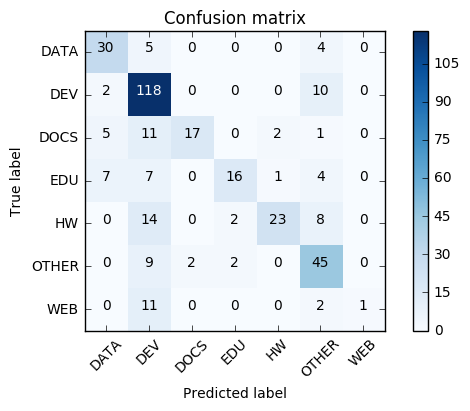

In [55]:
analyze_results(vc)